In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [28]:
csv_file_path = 'new_output_original_data.csv'
# 讀取 CSV 檔案並轉換成 DataFrame
original_data = pd.read_csv(csv_file_path)
original_data

,date,stock_id,CLOSE_O,close,open,high,low,volume,ht_dcperiod,ht_dcphase,...,trange,ad,adosc,obv,cash_buy,cash_sell,TW_open,TW_high,TW_low,TW_close
0,2012-05-18,2330,81.8,56.58,58.68,58.68,56.58,57620539,16.884669,293.866862,...,2.28,1.072926e+09,-1.439889e+07,7.872773e+08,29.185,29.727,7252.240234,7253.100098,7149.359863,7151.189941
1,2012-05-22,2330,82.2,56.85,57.35,57.55,56.85,33977797,16.178534,-23.812457,...,0.70,1.060558e+09,-2.246550e+07,7.857143e+08,29.210,29.752,7257.959961,7274.890137,7232.520020,7274.890137
2,2012-05-23,2330,79.1,54.71,56.61,56.81,54.61,63269956,16.031522,-4.218124,...,2.24,1.003040e+09,-4.246989e+07,7.224444e+08,29.160,29.702,7213.600098,7213.600098,7130.520020,7147.750000
3,2012-05-24,2330,80.6,55.75,54.05,55.75,53.25,40984054,16.076772,-0.812116,...,2.50,1.044024e+09,-3.375222e+07,7.634284e+08,29.190,29.732,7155.740234,7190.549805,7090.470215,7124.890137
4,2012-05-25,2330,80.0,55.33,55.13,55.83,54.53,28279141,16.356346,-2.029960,...,1.30,1.050550e+09,-2.504108e+07,7.351493e+08,29.240,29.782,7116.330078,7139.759766,7066.390137,7071.629883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168855,2024-07-12,2383,470.0,470.00,492.00,493.00,470.00,7815616,25.537477,178.990377,...,30.00,-8.454861e+08,-2.612652e+06,1.303426e+09,32.110,32.780,23955.669922,24045.730469,23774.220703,23916.929688
168856,2024-07-16,2383,474.5,474.50,475.00,480.00,471.00,2575873,27.465694,191.133868,...,10.00,-8.456741e+08,-3.585815e+06,1.306002e+09,32.175,32.845,23880.330078,24174.179688,23861.769531,23997.250000
168857,2024-07-17,2383,462.0,462.00,474.00,475.00,461.50,5034091,27.781844,198.018710,...,13.50,-8.503353e+08,-4.821849e+06,1.300967e+09,32.225,32.895,23827.269531,23993.679688,23650.939453,23769.820312
168858,2024-07-18,2383,447.5,447.50,450.00,451.00,441.00,4973436,27.493187,208.728958,...,21.00,-8.488432e+08,-4.414411e+06,1.295994e+09,32.215,32.885,23373.009766,23450.910156,23148.740234,23398.470703


In [29]:
original_data.columns[3:]

Index(['close', 'open', 'high', 'low', 'volume', 'ht_dcperiod', 'ht_dcphase',
       'inphase', 'quadrature', 'sine',
       ...
       'trange', 'ad', 'adosc', 'obv', 'cash_buy', 'cash_sell', 'TW_open',
       'TW_high', 'TW_low', 'TW_close'],
      dtype='object', length=117)

In [30]:
ss = MinMaxScaler()

feature_names = list(original_data.columns[3:])

df_feature= ss.fit_transform(original_data[feature_names])

df_feature = pd.DataFrame(df_feature, index=original_data.index, columns=feature_names)
df_feature["stock_id"] = original_data['stock_id'].copy()
df_feature["close_o"] = original_data['CLOSE_O'].copy()
df_feature["date"] = original_data['date'].copy()
original_data = df_feature
original_data

# 後來加的 但報錯
import joblib
joblib.dump(ss, 'tcnae_minmax_scaler.pkl')

['tcnae_minmax_scaler.pkl']

In [31]:
data_tcn_train = np.zeros((1, 20, 117), dtype=np.float64)
data_tcn_valid = np.zeros((1, 20, 117), dtype=np.float64)
data_tcn_predict = np.zeros((1, 20, 117), dtype=np.float64)

TRAIN_START_DATE = '2013/01/01'
TRAIN_END_DATE = '2020/11/13'
VALID_START_DATE = '2020/10/16' #2020/11/14開始
VALID_END_DATE = '2021/11/14'
PREDICT_START_DATE = '2021/10/15' #2021/11/14開始
PREDICT_END_DATE = '2024/12/31' 

target_date_col="date"
# 根据日期篩選數據
original_data[target_date_col] = pd.to_datetime(original_data[target_date_col])
tcn_train = original_data[(original_data[target_date_col] >= TRAIN_START_DATE) & (original_data[target_date_col] < TRAIN_END_DATE)]
tcn_valid = original_data[(original_data[target_date_col] >= VALID_START_DATE) & (original_data[target_date_col] < VALID_END_DATE)]
tcn_predict = original_data[(original_data[target_date_col] >= PREDICT_START_DATE) & (original_data[target_date_col] < PREDICT_END_DATE)]

unique_stock_ids = original_data['stock_id'].unique()


coding_tcn_20_train = pd.DataFrame(columns=['date', 'stock_id', 'close', 
                                            'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                            'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                            'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                            'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
coding_tcn_20_valid = pd.DataFrame(columns=['date', 'stock_id', 'close', 
                                            'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                            'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                            'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                            'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
coding_tcn_20_predict = pd.DataFrame(columns=['date', 'stock_id', 'close', 
                                              'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                              'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                              'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                              'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])

    
for stock_id in unique_stock_ids:
    
    df_SIN = tcn_train[tcn_train['stock_id'] == stock_id]
    df_SIN_valid = tcn_valid[tcn_valid['stock_id'] == stock_id]
    df_SIN_predict = tcn_predict[tcn_predict['stock_id'] == stock_id]
    
    data_stock = np.zeros((len(df_SIN) - 19, 20, 117), dtype=np.float64)
    data_stock_valid = np.zeros((len(df_SIN_valid) - 19, 20, 117), dtype=np.float64)
    data_stock_predict = np.zeros((len(df_SIN_predict) - 19, 20, 117), dtype=np.float64)
    

    tcn_20_train = pd.DataFrame(columns=['date', 'stock_id', 'close', 
                                         'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                         'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                         'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                         'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
    tcn_20_valid = pd.DataFrame(columns=['date', 'stock_id', 'close', 
                                         'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                         'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                         'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                         'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
    tcn_20_predict = pd.DataFrame(columns=['date', 'stock_id', 'close',
                                           'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                           'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                           'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                           'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])

    tcn_20_train['date'] = df_SIN['date'][19:]  
    tcn_20_train['stock_id'] = df_SIN['stock_id'][19:] 
    tcn_20_train['close'] = df_SIN['close_o'][19:] 

    tcn_20_valid['date'] = df_SIN_valid['date'][19:] 
    tcn_20_valid['stock_id'] = df_SIN_valid['stock_id'][19:]  
    tcn_20_valid['close'] = df_SIN_valid['close_o'][19:]
    
    tcn_20_predict['date'] = df_SIN_predict['date'][19:] 
    tcn_20_predict['stock_id'] = df_SIN_predict['stock_id'][19:] 
    tcn_20_predict['close'] = df_SIN_predict['close_o'][19:]  
        
    for i in range(len(df_SIN) - 19):
        subset_data = df_SIN.iloc[i:i+20, :117].values
        data_stock[i] = subset_data
        id_close_train = df_SIN.iloc[i:i+20]

    for i in range(len(df_SIN_valid) - 19):
        subset_data_valid = df_SIN_valid.iloc[i:i+20, :117].values
        data_stock_valid[i] = subset_data_valid
        id_close_valid = df_SIN[i:i+20]
        
    for i in range(len(df_SIN_predict) - 19):
        subset_data_predict = df_SIN_predict.iloc[i:i+20, :117].values
        data_stock_predict[i] = subset_data_predict
        id_close_predict = df_SIN[i:i+20]
        

    #TCN訓練資料
    data_tcn_train = np.concatenate((data_tcn_train, data_stock), axis=0)
    data_tcn_valid = np.concatenate((data_tcn_valid, data_stock_valid), axis=0)
    data_tcn_predict = np.concatenate((data_tcn_predict, data_stock_predict), axis=0)

    #組合TCN的壓縮資料, 包含stock_id, date, close
    coding_tcn_20_train = np.concatenate((coding_tcn_20_train, tcn_20_train), axis=0)
    coding_tcn_20_valid = np.concatenate((coding_tcn_20_valid, tcn_20_valid), axis=0)
    coding_tcn_20_predict = np.concatenate((coding_tcn_20_predict, tcn_20_predict), axis=0)

# 将列表转换为 NumPy 数组
data_tcn_train = np.array(data_tcn_train)
data_tcn_valid = np.array(data_tcn_valid)
data_tcn_predict = np.array(data_tcn_predict)

#過濾第一行是0的部分
data_tcn_train = data_tcn_train[1:]
data_tcn_valid = data_tcn_valid[1:]
data_tcn_predict = data_tcn_predict[1:]
# 输出结果
print(data_tcn_train.shape)
print(data_tcn_valid.shape)
print(data_tcn_predict.shape)


KeyboardInterrupt: 

In [6]:
coding_tcn_20_train_df = pd.DataFrame(coding_tcn_20_train, columns=['date', 'stock_id', 'close', 
                                                                   'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                                                   'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                                                   'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                                                   'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
coding_tcn_20_valid_df = pd.DataFrame(coding_tcn_20_valid, columns=['date', 'stock_id', 'close', 
                                                                   'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                                                   'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                                                   'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                                                   'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
coding_tcn_20_predict_df = pd.DataFrame(coding_tcn_20_predict, columns=['date', 'stock_id', 'close', 
                                                                       'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                                                       'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                                                       'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                                                       'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])


In [ ]:
from tcnae import TCNAE # tcnae.py: Specification of the TCN-AE model
from keras.models import load_model

In [ ]:
tcn_ae_20 = TCNAE(ts_dimension = 117,verbose = 2,filters_conv1d=20) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 117)]       0         
                                                                 
 tcn-enc (TCN)               (None, None, 40)          514880    
                                                                 
 conv1d (Conv1D)             (None, None, 20)          820       
                                                                 
 average_pooling1d (Average  (None, None, 20)          0         
 Pooling1D)                                                      
                                                                 
 activation (Activation)     (None, None, 20)          0         
                                                                 
 up_sampling1d (UpSampling1  (None, None, 20)          0         
 D)                                                          

In [ ]:
history_tcn_20 =tcn_ae_20.fit(data_tcn_train, data_tcn_train,data_tcn_valid, batch_size=256, epochs=10, verbose=2 )

> Starting the Training...
Epoch 1/10
419/419 - 305s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0128 - val_mse: 0.0128 - 305s/epoch - 727ms/step
Epoch 2/10
419/419 - 310s - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0107 - val_mse: 0.0107 - 310s/epoch - 739ms/step
Epoch 3/10
419/419 - 322s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0097 - val_mse: 0.0097 - 322s/epoch - 768ms/step
Epoch 4/10
419/419 - 324s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0092 - val_mse: 0.0092 - 324s/epoch - 774ms/step
Epoch 5/10
419/419 - 312s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0090 - val_mse: 0.0090 - 312s/epoch - 744ms/step
Epoch 6/10
419/419 - 318s - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0086 - val_mse: 0.0086 - 318s/epoch - 760ms/step
Epoch 7/10
419/419 - 355s - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0085 - val_mse: 0.0085 - 355s/epoch - 847ms/step
Epoch 8/10
419/419 - 330s - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0083 - val_mse: 0.0083 - 330s/epoch - 788ms/step
Epoch 9/10
419/419 - 321s - l

c:\Users\yaowe\anaconda3\envs\portfolio_management\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
#儲存loss
loss_data = pd.DataFrame({
    'val_loss_tcn_20': history_tcn_20.history['val_loss']
})

loss_data.to_csv('loss_history_20.csv', index=False)

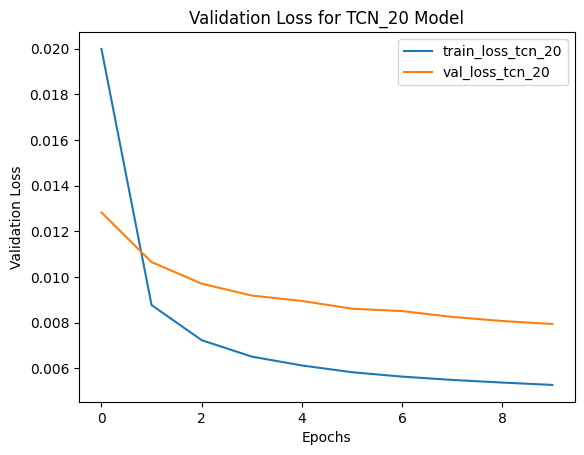

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_tcn_20.history['loss'], label='train_loss_tcn_20')
plt.plot(history_tcn_20.history['val_loss'], label='val_loss_tcn_20')


plt.title('Validation Loss for TCN_20 Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()


plt.savefig('tcn_20_loss_.jpg', format='jpg')


plt.show()

In [15]:
train_20_encoder =  tcn_ae_20.tcn_encoder_train(data_tcn_train)
print("X_encoder.shape", train_20_encoder.shape) # This is one long time series

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 117)]       0         
                                                                 
 tcn-enc (TCN)               (None, None, 40)          514880    
                                                                 
 conv1d (Conv1D)             (None, None, 20)          820       
                                                                 
 average_pooling1d (Average  (None, None, 20)          0         
 Pooling1D)                                                      
                                                                 
 activation (Activation)     (None, None, 20)          0         
                                                                 
Total params: 515700 (1.97 MB)
Trainable params: 515700 (1.97 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [16]:
train_20_encoder_reshaped = train_20_encoder.reshape(train_20_encoder.shape[0], 20)

In [ ]:
##把encoder的資料放回coding裡面
coding_tcn_20_train_df[['coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                        'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                        'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                        'coding16', 'coding17', 'coding18', 'coding19', 'coding20']] = train_20_encoder_reshaped
coding_tcn_20_train_df

,date,stock_id,close,coding1,coding2,coding3,coding4,coding5,coding6,coding7,...,coding11,coding12,coding13,coding14,coding15,coding16,coding17,coding18,coding19,coding20
0,2013-02-06,2330,105.0,-0.891387,-1.132257,0.180424,-0.075629,-0.196192,0.073374,-0.094482,...,1.187467,0.170785,-0.438213,-0.062588,0.518549,0.278063,0.188779,0.183471,0.286183,0.028004
1,2013-02-19,2330,107.0,-0.931202,-1.139689,0.262941,-0.082532,-0.144929,0.075714,-0.070069,...,1.167690,0.151813,-0.422652,0.011265,0.515602,0.331840,0.124686,0.233157,0.264472,0.060791
2,2013-02-20,2330,109.0,-0.978801,-1.181298,0.294435,-0.099939,-0.076737,0.128976,-0.052025,...,1.114884,0.101893,-0.425656,0.074855,0.427604,0.396291,0.131745,0.294661,0.258460,0.141507
3,2013-02-21,2330,107.0,-0.972210,-1.255813,0.263976,-0.036109,-0.059993,0.130116,-0.079749,...,1.020496,0.054345,-0.460118,0.117987,0.389304,0.432780,0.133773,0.345738,0.310345,0.108091
4,2013-02-22,2330,105.5,-0.945936,-1.300517,0.227233,0.050670,-0.061465,0.046549,-0.105872,...,0.946815,0.012372,-0.480467,0.142426,0.455133,0.431923,0.123081,0.421000,0.377016,0.014246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107109,2020-11-05,2383,147.5,-0.175536,-1.277844,-0.275556,-0.190133,0.529015,-0.194538,0.164620,...,1.416588,-0.045003,-0.694193,-0.293558,-0.067417,0.380524,-0.142441,0.310691,0.019707,-0.066724
107110,2020-11-06,2383,146.5,-0.227522,-1.309913,-0.346958,-0.189023,0.457894,-0.163180,0.139205,...,1.396056,0.031826,-0.675926,-0.279429,-0.195830,0.367985,-0.181695,0.218176,-0.054649,-0.075230
107111,2020-11-10,2383,147.5,-0.266565,-1.270159,-0.360972,-0.218834,0.291975,-0.171828,0.121628,...,1.377041,0.036658,-0.661266,-0.252492,-0.192194,0.341245,-0.170007,0.251751,-0.113057,-0.032262
107112,2020-11-11,2383,152.5,-0.323822,-1.180035,-0.311294,-0.262424,0.157213,-0.194765,0.135537,...,1.391948,-0.020693,-0.647851,-0.214105,-0.119148,0.313919,-0.147107,0.339669,-0.123658,0.037007


In [18]:
valid_20_encoder =  tcn_ae_20.tcn_encoder_train(data_tcn_valid)
print("X_encoder.shape", valid_20_encoder.shape) # This is one long time series

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 117)]       0         
                                                                 
 tcn-enc (TCN)               (None, None, 40)          514880    
                                                                 
 conv1d (Conv1D)             (None, None, 20)          820       
                                                                 
 average_pooling1d (Average  (None, None, 20)          0         
 Pooling1D)                                                      
                                                                 
 activation (Activation)     (None, None, 20)          0         
                                                                 
Total params: 515700 (1.97 MB)
Trainable params: 515700 (1.97 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [ ]:
valid_20_encoder_reshaped = valid_20_encoder.reshape(valid_20_encoder.shape[0], 20)
coding_tcn_20_valid_df[['coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                        'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                        'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                        'coding16', 'coding17', 'coding18', 'coding19', 'coding20']] = valid_20_encoder_reshaped
coding_tcn_20_valid_df

,date,stock_id,close,coding1,coding2,coding3,coding4,coding5,coding6,coding7,...,coding11,coding12,coding13,coding14,coding15,coding16,coding17,coding18,coding19,coding20
0,2020-11-19,2330,490.0,-0.661153,-1.397880,0.480499,-0.138744,0.478012,-0.231203,0.298558,...,1.282755,-0.010963,-0.580027,-0.147395,-0.253449,0.600091,-0.150078,0.386360,0.255532,-0.126445
1,2020-11-20,2330,488.0,-0.670580,-1.472800,0.352631,-0.083067,0.544600,-0.310373,0.287890,...,1.268056,0.060942,-0.614559,-0.091361,-0.311275,0.610531,-0.153502,0.382799,0.212399,-0.152275
2,2020-11-24,2330,492.0,-0.643891,-1.545393,0.132103,-0.050913,0.471680,-0.401977,0.252232,...,1.244562,0.077826,-0.661073,-0.032054,-0.351270,0.625660,-0.143676,0.434677,0.196922,-0.154779
3,2020-11-25,2330,487.0,-0.548715,-1.591363,-0.064104,-0.036547,0.357266,-0.488584,0.218243,...,1.239828,0.045102,-0.723067,-0.003331,-0.319497,0.640715,-0.065939,0.533165,0.209320,-0.132153
4,2020-11-26,2330,489.0,-0.432794,-1.569823,-0.140544,-0.068734,0.299588,-0.572022,0.233137,...,1.273922,-0.060536,-0.774291,-0.056350,-0.217349,0.609311,0.035263,0.596350,0.264521,-0.080865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13870,2021-11-04,2383,231.5,-0.350355,-1.331174,0.083199,-0.181981,0.449425,-0.369839,0.113402,...,1.166554,-0.098251,-0.853729,0.019863,-0.128866,0.641241,-0.180469,0.747255,-0.055728,-0.084222
13871,2021-11-05,2383,230.5,-0.311509,-1.344826,-0.058307,-0.145969,0.497258,-0.415396,0.144527,...,1.214996,-0.139137,-0.857413,-0.015117,-0.111550,0.606664,-0.136845,0.741606,-0.004917,-0.086652
13872,2021-11-10,2383,231.0,-0.303431,-1.364932,-0.224173,-0.131227,0.535793,-0.384983,0.160836,...,1.253216,-0.136061,-0.867223,-0.105453,-0.168954,0.559103,-0.074146,0.693137,0.032810,-0.073701
13873,2021-11-11,2383,229.5,-0.278761,-1.402491,-0.345676,-0.155080,0.547158,-0.351899,0.191928,...,1.299791,-0.112602,-0.841062,-0.179413,-0.234288,0.541075,0.000716,0.654459,0.050440,-0.080983


In [20]:
predict_20_encoder =  tcn_ae_20.tcn_encoder_train(data_tcn_predict)
print("X_encoder.shape", predict_20_encoder.shape) # This is one long time series

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 117)]       0         
                                                                 
 tcn-enc (TCN)               (None, None, 40)          514880    
                                                                 
 conv1d (Conv1D)             (None, None, 20)          820       
                                                                 
 average_pooling1d (Average  (None, None, 20)          0         
 Pooling1D)                                                      
                                                                 
 activation (Activation)     (None, None, 20)          0         
                                                                 
Total params: 515700 (1.97 MB)
Trainable params: 515700 (1.97 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [ ]:
predict_20_encoder_reshaped = predict_20_encoder.reshape(predict_20_encoder.shape[0], 20)
coding_tcn_20_predict_df[['coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                          'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                          'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                          'coding16', 'coding17', 'coding18', 'coding19', 'coding20']] = predict_20_encoder_reshaped
coding_tcn_20_predict_df

,date,stock_id,close,coding1,coding2,coding3,coding4,coding5,coding6,coding7,...,coding11,coding12,coding13,coding14,coding15,coding16,coding17,coding18,coding19,coding20
0,2021-11-18,2330,613.0,-0.353232,-1.758131,0.061583,-0.230482,0.212877,-0.128859,0.486143,...,1.522733,0.118721,-0.919536,-0.361056,-0.262689,0.659989,-0.303164,0.373732,0.195498,-0.060797
1,2021-11-19,2330,618.0,-0.341872,-1.691161,0.178867,-0.219182,0.212050,-0.083237,0.426851,...,1.496748,0.126467,-0.947558,-0.436104,-0.259152,0.578866,-0.318284,0.386643,0.241231,-0.110916
2,2021-11-23,2330,612.0,-0.341480,-1.624826,0.250652,-0.167458,0.271824,-0.130842,0.430654,...,1.509777,0.149469,-0.901615,-0.452004,-0.249780,0.544237,-0.401255,0.395835,0.229732,-0.183350
3,2021-11-24,2330,603.0,-0.334471,-1.583961,0.217778,-0.092548,0.311160,-0.198156,0.441881,...,1.532578,0.169152,-0.843168,-0.407970,-0.285259,0.570314,-0.506648,0.397532,0.194830,-0.244495
4,2021-11-25,2330,603.0,-0.316691,-1.565480,0.096889,-0.026170,0.323306,-0.232057,0.428661,...,1.532166,0.127617,-0.829189,-0.357359,-0.355466,0.631347,-0.561848,0.430052,0.180661,-0.230439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36937,2024-07-12,2383,470.0,-0.226041,-1.887476,0.114769,-0.142352,0.372386,-0.311535,0.698448,...,1.577125,0.129475,-1.004524,-0.437220,-0.501439,0.592522,-0.449657,0.235194,0.316694,-0.426502
36938,2024-07-16,2383,474.5,-0.188539,-1.853688,0.015327,-0.051195,0.324186,-0.370504,0.689775,...,1.593884,0.061889,-0.998091,-0.429025,-0.511553,0.635365,-0.421571,0.219269,0.345777,-0.435641
36939,2024-07-17,2383,462.0,-0.105643,-1.790007,-0.081738,0.012175,0.246639,-0.443535,0.653906,...,1.611176,-0.014351,-0.965734,-0.427902,-0.479116,0.670639,-0.367787,0.220318,0.406707,-0.477913
36940,2024-07-18,2383,447.5,-0.052394,-1.697689,-0.123707,0.069472,0.232699,-0.492911,0.664337,...,1.682724,-0.067898,-0.903116,-0.476912,-0.415658,0.669103,-0.277553,0.217319,0.443614,-0.484921


In [ ]:
combined_df = pd.concat([coding_tcn_20_train_df, coding_tcn_20_valid_df, coding_tcn_20_predict_df], ignore_index=True)
combined_df

,date,stock_id,close,coding1,coding2,coding3,coding4,coding5,coding6,coding7,...,coding11,coding12,coding13,coding14,coding15,coding16,coding17,coding18,coding19,coding20
0,2013-02-06,2330,105.0,-0.891387,-1.132257,0.180424,-0.075629,-0.196192,0.073374,-0.094482,...,1.187467,0.170785,-0.438213,-0.062588,0.518549,0.278063,0.188779,0.183471,0.286183,0.028004
1,2013-02-19,2330,107.0,-0.931202,-1.139689,0.262941,-0.082532,-0.144929,0.075714,-0.070069,...,1.167690,0.151813,-0.422652,0.011265,0.515602,0.331840,0.124686,0.233157,0.264472,0.060791
2,2013-02-20,2330,109.0,-0.978801,-1.181298,0.294435,-0.099939,-0.076737,0.128976,-0.052025,...,1.114884,0.101893,-0.425656,0.074855,0.427604,0.396291,0.131745,0.294661,0.258460,0.141507
3,2013-02-21,2330,107.0,-0.972210,-1.255813,0.263976,-0.036109,-0.059993,0.130116,-0.079749,...,1.020496,0.054345,-0.460118,0.117987,0.389304,0.432780,0.133773,0.345738,0.310345,0.108091
4,2013-02-22,2330,105.5,-0.945936,-1.300517,0.227233,0.050670,-0.061465,0.046549,-0.105872,...,0.946815,0.012372,-0.480467,0.142426,0.455133,0.431923,0.123081,0.421000,0.377016,0.014246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157926,2024-07-12,2383,470.0,-0.226041,-1.887476,0.114769,-0.142352,0.372386,-0.311535,0.698448,...,1.577125,0.129475,-1.004524,-0.437220,-0.501439,0.592522,-0.449657,0.235194,0.316694,-0.426502
157927,2024-07-16,2383,474.5,-0.188539,-1.853688,0.015327,-0.051195,0.324186,-0.370504,0.689775,...,1.593884,0.061889,-0.998091,-0.429025,-0.511553,0.635365,-0.421571,0.219269,0.345777,-0.435641
157928,2024-07-17,2383,462.0,-0.105643,-1.790007,-0.081738,0.012175,0.246639,-0.443535,0.653906,...,1.611176,-0.014351,-0.965734,-0.427902,-0.479116,0.670639,-0.367787,0.220318,0.406707,-0.477913
157929,2024-07-18,2383,447.5,-0.052394,-1.697689,-0.123707,0.069472,0.232699,-0.492911,0.664337,...,1.682724,-0.067898,-0.903116,-0.476912,-0.415658,0.669103,-0.277553,0.217319,0.443614,-0.484921


In [23]:
new_columns = {'stock_id': 'tic'}
combined_df = combined_df.rename(columns=new_columns)

combined_df.to_csv('new_tcn_daily_trade_info.csv', index=False)